<div style="border-width:1; border-radius: 15px; border-style: solid; border-color: rgb(10, 10, 10); background-color: #316B83; text-align: center;font: 14pt 'Candara';font-weight:bold;"><h1> Stating the QS</h1></div>

> #### _`QS:`_ The relation between company attributes and the time software engineer works on it

>|Set Expectation | Collect Info | Match Results| 
>|----|----|----|
>| Question is answerable, there exist enough data to answer it.| - | - |
<br>

## Imports

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
sns.set_style(
    style='darkgrid', 
    rc={'axes.facecolor': '.9', 'grid.color': '.8'}
)
sns.set_palette(palette='deep')
sns_c = sns.color_palette(palette='deep')

<div style="border-width:1; border-radius: 15px; border-style: solid; border-color: rgb(10, 10, 10); background-color: #316B83; text-align: center;font: 14pt 'Candara';font-weight:bold;"><h1> Data Exploration</h1></div>

## Reading Companies data

In [63]:
# read companies data
df_companies = pd.read_csv("../data/companies/companies.csv")

# select only the companySize, location, founded,industry,headquarters,query 
df_companies = df_companies[['companySize','location','founded','industry','headquarters','query']]
df_companies.head()


,companySize,location,founded,industry,headquarters,query
0,51-200 employees,Giza,1983.0,IT Services and IT Consulting,"Giza, Cairo",https://www.linkedin.com/company/15805726/
1,NaN,NaN,NaN,NaN,NaN,https://www.linkedin.com/company/18305384/
2,11-50 employees,Beirut,2005.0,Outsourcing and Offshoring Consulting,NaN,https://www.linkedin.com/company/2205041/
3,11-50 employees,Basel,2019.0,"Technology, Information and Internet","Basel, Basel-Stadt",https://www.linkedin.com/company/30101254/
4,"1,001-5,000 employees",Cairo,NaN,Telecommunications,NaN,https://www.linkedin.com/company/777868/


Percentage of na in companySize:  0.05089285714285714


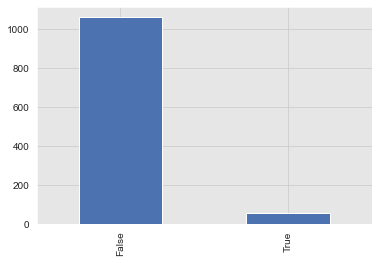

In [64]:
# plot the number of na vs not na in companySize
df_companies['companySize'].isna().value_counts().plot(kind='bar', color=sns_c[0])

# get the percentage of na in data 
print("Percentage of na in companySize: ", df_companies['companySize'].isna().sum()/len(df_companies))

## Filtering Nulls & Preprocessing:
- We found that some founded year are garbage so we will only take in consideration the years from 1000-2023
- Turning founded type to int

In [65]:
# remove na values in companySize
df_companies = df_companies.dropna(subset=['companySize','location','founded','industry','headquarters','query'])

df_companies = df_companies[(df_companies['founded'].astype(int) > 999) & (df_companies['founded'].astype(int) < 2024)]

# change the type of founded to int
df_companies['founded'] = df_companies['founded'].astype(int)


## Show number of companies we have in each category of CompanySize

<AxesSubplot:title={'center':'Number of companies by companySize'}, xlabel='companySize'>

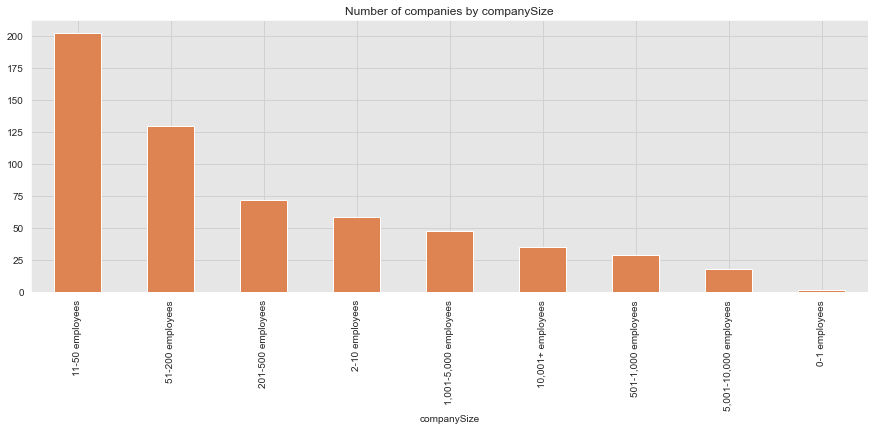

In [66]:
# plot the number of companies by companySize
df_companies.groupby('companySize').size().sort_values(ascending=False).plot(kind='bar', figsize=(15, 5), color=sns_c[1],title="Number of companies by companySize")

## Show the number of companies we have in each location & print top 20 locations only

<AxesSubplot:title={'center':'Number of companies by location'}, xlabel='location'>

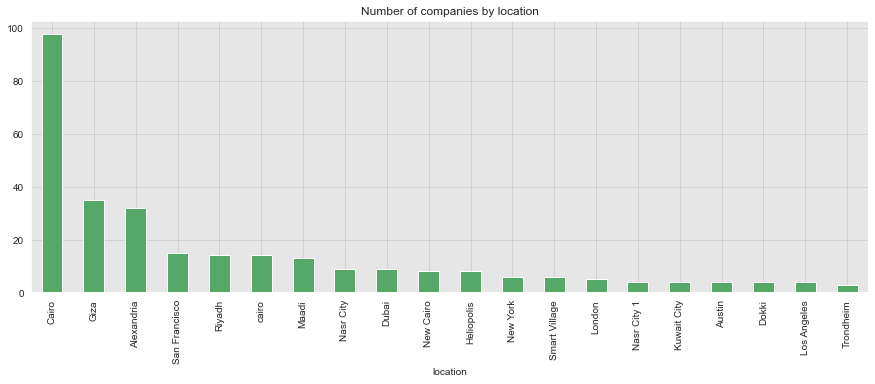

In [67]:
# plot the companies wrt location and show only first 20 results
df_companies.groupby('location').size().sort_values(ascending=False)[:20].plot(kind='bar', figsize=(15, 5), color=sns_c[2],title="Number of companies by location")

## Show the number of companies regarding it's founded year

Max founded year:  2023
Min founded year:  1816


<AxesSubplot:title={'center':'Number of companies by founded year'}, xlabel='founded'>

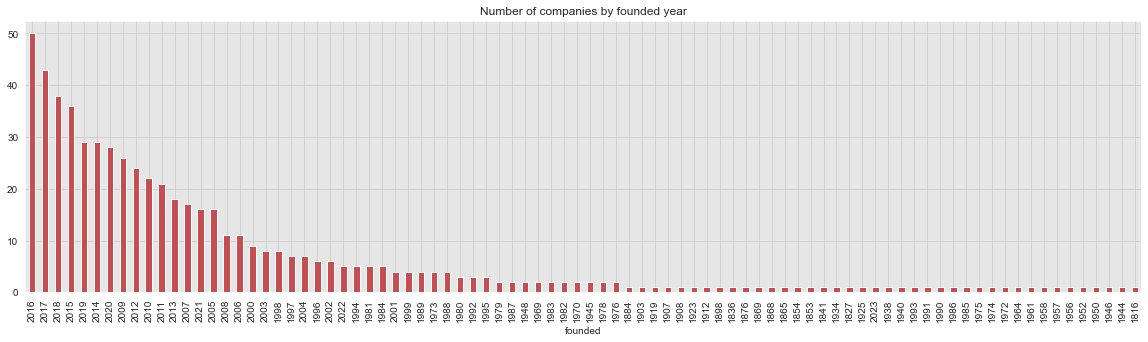

In [68]:
# print max and min founded year
print("Max founded year: ", df_companies['founded'].max())
print("Min founded year: ", df_companies['founded'].min())

# plot company wrt founded year and show first 20 results
df_companies.groupby('founded').size().sort_values(ascending=False).plot(kind='bar', figsize=(20, 5), color=sns_c[3],title="Number of companies by founded year")

<div style="border-width:1; border-radius: 15px; border-style: solid; border-color: rgb(10, 10, 10); background-color: #316B83; text-align: center;font: 14pt 'Candara';font-weight:bold;"><h1> Stating & Refining QS</h1></div>

> #### _`QS:`_ The relation between company attributes and the time software engineer works on it

>|Set Expectation | Collect Info | Match Results| 
>|----|----|----|
>| Question is answerable, there exist enough data to answer it.| The data is we have is biased a little bit in each metric to a specific value but we still can take an average due to making our visualizations to be able recover this bias | - |
>| The bigger the company the bigger the chance that employee will work in it longer| - | - |
<br>

## Reading the data of employees

In [69]:
df_employees = pd.read_csv("../data/preprocessed-data/normalized csv/experiences.csv")

# plot the head of the dataframe
df_employees.head()


,User,CompanyUrl,Company,Title,EmploymentType,From,To,Duration,Location,title_tag
0,%D9%90%D9%90amiraelmergawy,https://www.linkedin.com/company/294614/,Information Technology Institute (ITI),teaching assistant,Full-time,2022-08-01,Present,9.0,Egypt,Teaching
1,%D9%90%D9%90amiraelmergawy,https://www.linkedin.com/company/15805726/,National Telecommunication Institute (NTI),mean stack developer,Internship,2020-11-01,Jan 2021,3.0,NaN,Fullstack
2,%D9%90%D9%90amiraelmergawy,https://www.linkedin.com/company/18305384/,الجهاز المركزي للتعبئة العامة و الاحصاء,software developer,Internship,2019-07-01,NaN,1.0,"Cairo, Egypt",Software
3,%D9%90%D9%90amiraelmergawy,https://www.linkedin.com/company/2205041/,(ISCC) Information Systems and Computers Center,software developer,Internship,2018-08-01,NaN,1.0,"Cairo, Egypt",Software
4,-ezz,https://www.linkedin.com/company/30101254/,sonono,software engineer,Full-time,2022-01-01,Present,16.0,"Basel, Switzerland",Software


## Filtering Employees Nulls & Preprocessing:
- Selecting only full-time,part-time,contract jobs
- Turning Duration into int type
- Selecting only important columns from data :
    - CompanyUrl `for joining data with company`
    - Duration `The main metric we will use to compare the time employee stays in company`
    - EmploymentType `used to select only full,part,contract employees`

In [70]:
# select only the CompanyUrl and the duration columns and EmploymentType
df_employees = df_employees[['CompanyUrl', 'Duration','EmploymentType']]

# remove na values in EmploymentType
df_employees = df_employees.dropna(subset=['EmploymentType','CompanyUrl','Duration'])

# change all values to lowercase
df_employees['EmploymentType'] = df_employees['EmploymentType'].str.lower()

# keep on EmployeeType which contains full-time, part-time, contract
df_employees = df_employees[df_employees['EmploymentType'].str.contains('full|part|contract')]

# head data
df_employees.head(10)

,CompanyUrl,Duration,EmploymentType
0,https://www.linkedin.com/company/294614/,9.0,full-time
4,https://www.linkedin.com/company/30101254/,16.0,full-time
5,https://www.linkedin.com/company/294614/,4.0,full-time
6,UNKNOWN,12.0,full-time
7,https://www.linkedin.com/company/777868/,12.0,full-time
8,https://www.linkedin.com/company/294614/,11.0,full-time
10,https://www.linkedin.com/company/18899346/,8.0,full-time
11,https://www.linkedin.com/company/85963270/,8.0,part-time
12,https://www.linkedin.com/company/3302698/,8.0,full-time
19,https://www.linkedin.com/company/623785/,16.0,full-time


## Combining Data

In [71]:
# combine the CompanyUrl with the df_companies dataframe
df_employees = df_employees.merge(df_companies, left_on='CompanyUrl', right_on='query')

# print na values in data 
print("Percentage of na in Duration: ", df_employees['Duration'].isna().sum()/len(df_employees))

# show the head of the dataframe
df_employees.head()


Percentage of na in Duration:  0.0


,CompanyUrl,Duration,EmploymentType,companySize,location,founded,industry,headquarters,query
0,https://www.linkedin.com/company/30101254/,16.0,full-time,11-50 employees,Basel,2019,"Technology, Information and Internet","Basel, Basel-Stadt",https://www.linkedin.com/company/30101254/
1,https://www.linkedin.com/company/30101254/,16.0,full-time,11-50 employees,Basel,2019,"Technology, Information and Internet","Basel, Basel-Stadt",https://www.linkedin.com/company/30101254/
2,https://www.linkedin.com/company/30101254/,8.0,full-time,11-50 employees,Basel,2019,"Technology, Information and Internet","Basel, Basel-Stadt",https://www.linkedin.com/company/30101254/
3,https://www.linkedin.com/company/30101254/,22.0,full-time,11-50 employees,Basel,2019,"Technology, Information and Internet","Basel, Basel-Stadt",https://www.linkedin.com/company/30101254/
4,https://www.linkedin.com/company/3302698/,8.0,full-time,11-50 employees,Vancouver,2006,IT Services and IT Consulting,"Vancouver, British Columbia",https://www.linkedin.com/company/3302698/


## Number of Employees .vs. Company Size

<AxesSubplot:title={'center':'Employees by companySize'}, xlabel='companySize'>

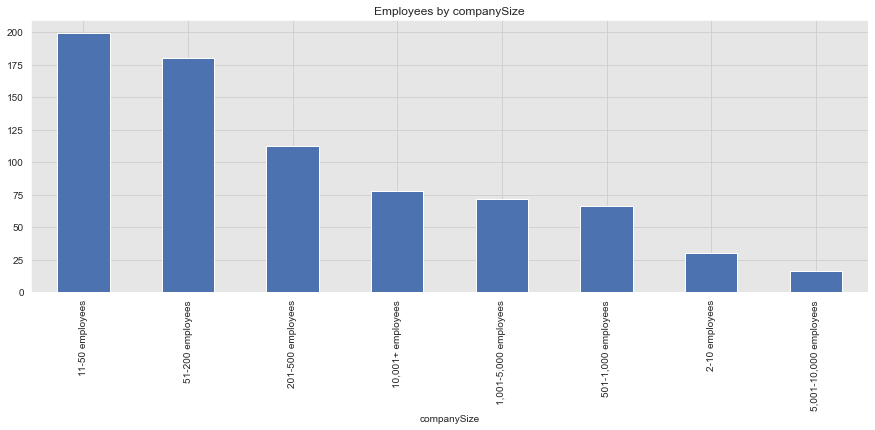

In [72]:
#count number of employees by companySize
df_employees.groupby('companySize').size().sort_values(ascending=False).plot(title="Employees by companySize", kind='bar', figsize=(15, 5), color=sns_c[0])

## Plotting The average time employees stay .vs. Company Size

<AxesSubplot:title={'center':'Duration VS CompanySize'}, xlabel='companySize'>

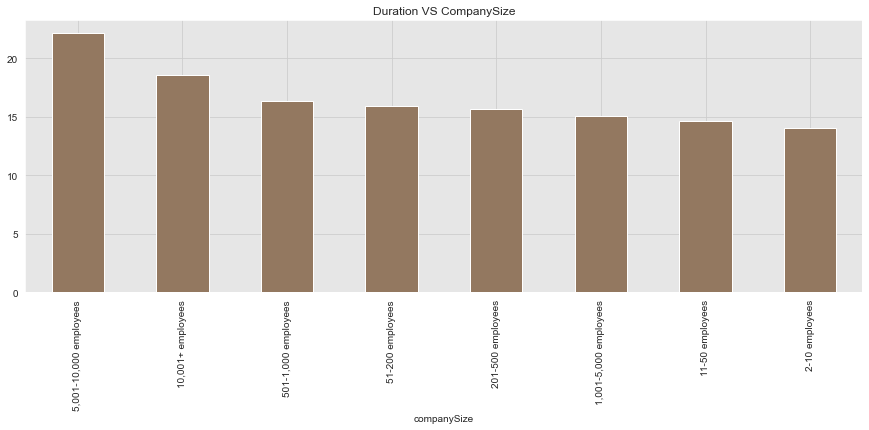

In [73]:
# average duration by companySize
df_employees.groupby('companySize')['Duration'].mean().sort_values(ascending=False).plot(title="Duration VS CompanySize",kind='bar', figsize=(15, 5), color=sns_c[5])

## Plotting Whisker plot of duration .vs. CompanySize

<AxesSubplot:title={'center':'Duration'}, xlabel='companySize'>

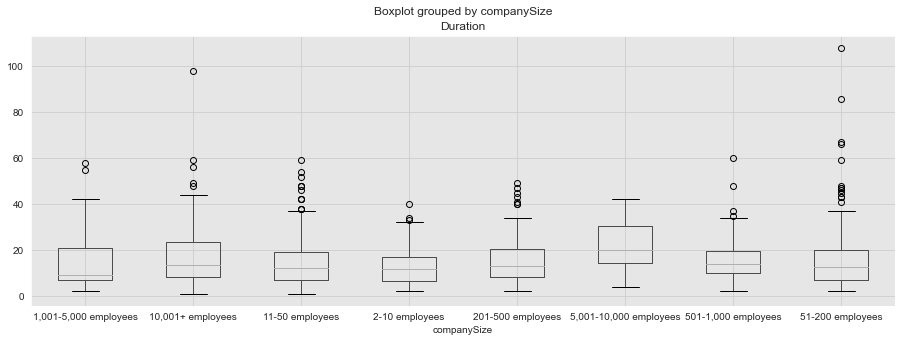

In [74]:
# plot the whisker box plot of duration by companySize
df_employees.boxplot(column='Duration', by='companySize', figsize=(15, 5))


## Show the Numbers of QR1, QR3 , Median

In [75]:
# print the IQR of duration by companySize as a table
df_employees.groupby('companySize')['Duration'].describe()[['25%','50%','75%']]

,25%,50%,75%
companySize,,,
"1,001-5,000 employees",6.75,9.0,21.00
"10,001+ employees",8.25,13.5,23.50
11-50 employees,7.00,12.0,19.00
2-10 employees,6.25,11.5,16.75
201-500 employees,8.00,13.0,20.25
"5,001-10,000 employees",14.50,20.0,30.25
"501-1,000 employees",10.00,14.0,19.75
51-200 employees,7.00,12.5,20.00


## Show count of outliers in the grouped data

In [76]:
# print the number of points of duration higher than 75% , 25% of Quartile by companySize
df_employees.groupby('companySize')['Duration'].apply(lambda x: (x > x.quantile(.75)).sum() + (x < x.quantile(.25)).sum())

companySize
1,001-5,000 employees     35
10,001+ employees         40
11-50 employees           96
2-10 employees            16
201-500 employees         55
5,001-10,000 employees     8
501-1,000 employees       32
51-200 employees          78
Name: Duration, dtype: int64

In [77]:

# print num of employees in each companySize
df_employees.groupby('companySize').size()


companySize
1,001-5,000 employees      72
10,001+ employees          78
11-50 employees           199
2-10 employees             30
201-500 employees         112
5,001-10,000 employees     16
501-1,000 employees        66
51-200 employees          180
dtype: int64

<div style="border-width:1; border-radius: 15px; border-style: solid; border-color: rgb(10, 10, 10); background-color: #316B83; text-align: center;font: 14pt 'Candara';font-weight:bold;"><h1> Stating & Refining QS</h1></div>

> #### _`QS:`_ The relation between company attributes and the time software engineer works on it

>|Set Expectation | Collect Info | Match Results| 
>|----|----|----|
>| Question is answerable, there exist enough data to answer it.| The data is we have is biased a little bit in each metric to a specific value but we still can take an average due to making our visualizations to be able recover this bias | ✅ |
>| The bigger the company the bigger the chance that employee will work in it longer| As we saw in the average graph it's somehow suffering from outliers which we noticed while using Whisker Box Plot , We can figure out from Whisker Box Plot that our expectation can't be confirmed as a right expectation since values are so close to each other so despite that 5k-10k & +10k are leading the board of values we aren't still sure about it  | ❌ |
>| The older the company the bigger the chance that employee will work in it longer  | - | - |

<br>

## Show Average Duration .vs. Founded

<AxesSubplot:title={'center':'Duration VS Location'}, xlabel='founded'>

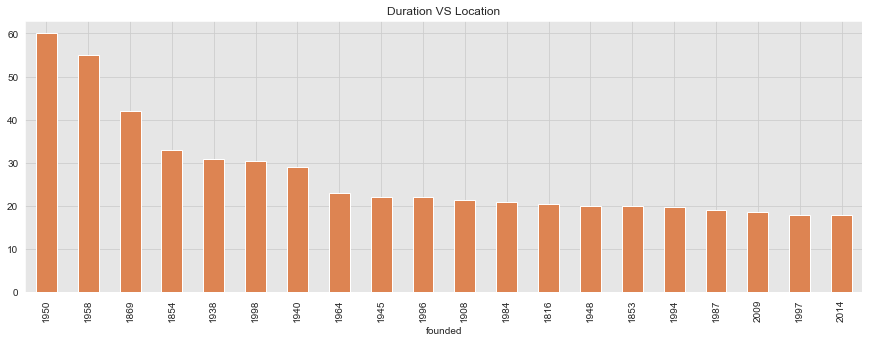

In [82]:
# average duration by location top 20
df_employees.groupby('founded')['Duration'].mean().sort_values(ascending=False)[:20].plot(title="Duration VS Location",kind='bar', figsize=(15, 5), color=sns_c[1])

<AxesSubplot:title={'center':'Duration VS CompanySize and Location'}, xlabel='companySize,founded'>

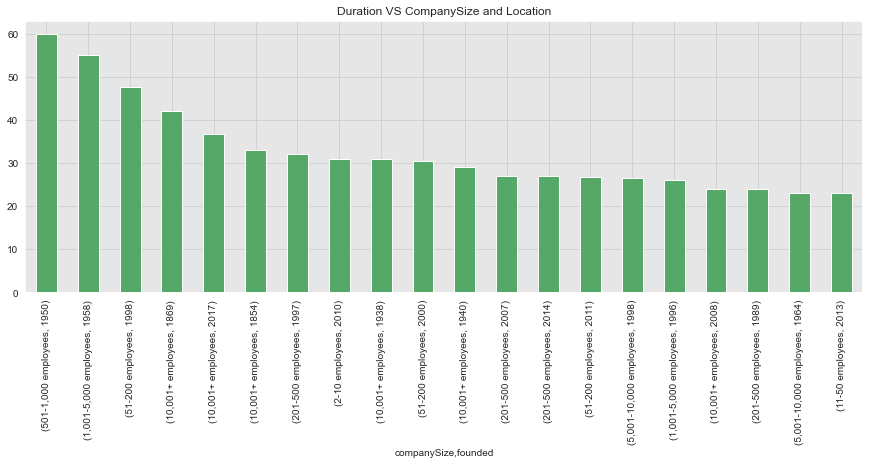

In [83]:
# show combination between average duration grouped by both companySize and founded , show top 20
df_employees.groupby(['companySize','founded'])['Duration'].mean().sort_values(ascending=False)[:20].plot(title="Duration VS CompanySize and Location",kind='bar', figsize=(15, 5), color=sns_c[2])

25%   50%    75%
companySize            founded                    
1,001-5,000 employees  1853     20.00  20.0  20.00
                       1919      5.75  11.5  21.75
                       1945     22.00  22.0  22.00
10,001+ employees      1816      8.50  12.0  27.50
                       1827      5.00   5.0   5.00
                       1854     33.00  33.0  33.00
11-50 employees        1992      3.00   3.0   3.00
                       1997     12.00  12.0  12.00
                       2001      3.00   3.0   3.00
2-10 employees         2009     12.00  12.0  12.00
                       2010     31.00  31.0  31.00
                       2012     13.00  13.0  13.00
201-500 employees      1973      7.00   7.0   7.00
                       1980     15.00  15.0  15.00
                       1985     13.00  13.0  13.00
5,001-10,000 employees 1948     20.00  20.0  20.00
                       1952      9.00   9.0   9.00
                       1964     13.50  23.0  32.50
501-1,000 employees    1944      7.00   7.0   7.00
                       1950     60.00  60.0  60.00
                       1973      9.00   9.0   9.00
51-200 employees       1983      2.75   3.5   4.25
                       1984     22.00  22.0  22.00
                       1991      6.00   6.0   6.00

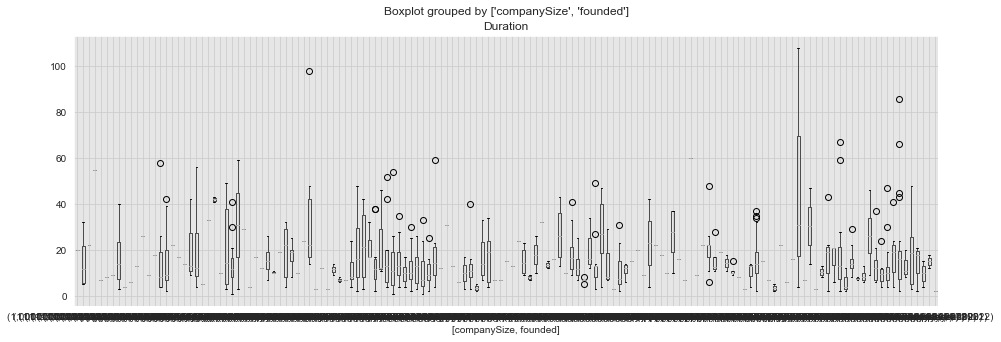

In [104]:
# show whisker box plot of duration grouped by both companySize and founded of top 20 results
df_employees.boxplot(column='Duration', by=['companySize','founded'], figsize=(15, 5))

# show the IQR of duration grouped by both companySize and founded of top 20 results and limit to 1 result per companySize
df_employees.groupby(['companySize','founded'])['Duration'].describe()[['25%','50%','75%']].groupby('companySize').head(3)

<div style="border-width:1; border-radius: 15px; border-style: solid; border-color: rgb(10, 10, 10); background-color: #316B83; text-align: center;font: 14pt 'Candara';font-weight:bold;"><h1> Stating & Refining QS</h1></div>

> #### _`QS:`_ The relation between company attributes and the time software engineer works on it

>|Set Expectation | Collect Info | Match Results| 
>|----|----|----|
>| Question is answerable, there exist enough data to answer it.| The data is we have is biased a little bit in each metric to a specific value but we still can take an average due to making our visualizations to be able recover this bias | ✅ |
>| The bigger the company the bigger the chance that employee will work in it longer| As we saw in the average graph it's somehow suffering from outliers which we noticed while using Whisker Box Plot , We can figure out from Whisker Box Plot that our expectation can't be confirmed as a right expectation since values are so close to each other so despite that 5k-10k & +10k are leading the board of values we aren't still sure about it  | ❌ |
>| The older the company the bigger the chance that employee will work in it longer  | From the above visualizations we can say that the year of foundation is correlated with the time employee stays in the company  | ✅ |

<br>

<div style="border-width:1; border-radius: 15px; border-style: solid; border-color: rgb(10, 10, 10); background-color: #316B83; text-align: center;font: 14pt 'Candara';font-weight:bold;"><h1> Interpreting Results</h1></div>

## Our Conclusion :
- The founded year is a strong metric in affecting on the time employee stays in company where it make sense because older company means more stable & established company & that's a good environment for any employee
- The Company size also shows a good metric but not stronger than founded metric 
- Making a combination between an old company & a big company size would ensure more & more that the employee time within this company will be longer.